In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import cv2
import glob
import tifffile as tiff
import matplotlib.pyplot as plt

In [2]:
image_list = []
code = []

for filename in glob.glob('R_LPA/*.tiff'):
    img = tiff.imread(filename)
    image_list.append(img)
    code.append(os.path.basename(filename).split('.tiff')[0])
    print(filename)
    

R_LPA\ADM001_Tmap_T15_R_LPA.tiff
R_LPA\ADM004_Tmap_T15_R_LPA.tiff
R_LPA\CTA002_Tmap_T15_R_LPA.tiff
R_LPA\CTA003_Tmap_T15_R_LPA.tiff
R_LPA\CTA004_Tmap_T15_R_LPA.tiff
R_LPA\ESP001_Tmap_T15_R_LPA.tiff
R_LPA\ESP002_Tmap_T15_R_LPA.tiff
R_LPA\ESP003_Tmap_T15_R_LPA.tiff
R_LPA\ESP006_Tmap_T15_R_LPA.tiff
R_LPA\ESP008_Tmap_T15_R_LPA.tiff
R_LPA\ESP009_Tmap_T15_R_LPA.tiff
R_LPA\ESP010_Tmap_T15_R_LPA.tiff
R_LPA\ESP011_Tmap_T15_R_LPA.tiff
R_LPA\EST004_Tmap_T15_R_LPA.tiff
R_LPA\EXT003_Tmap_T15_R_LPA.tiff
R_LPA\MED001_Tmap_T15_R_LPA.tiff
R_LPA\MED002_Tmap_T15_R_LPA.tiff
R_LPA\MED006_Tmap_T15_R_LPA.tiff
R_LPA\NRT001_Tmap_T15_R_LPA.tiff
R_LPA\NRT002_Tmap_T15_R_LPA.tiff
R_LPA\NRT003_Tmap_T15_R_LPA.tiff
R_LPA\NRT004_Tmap_T15_R_LPA.tiff


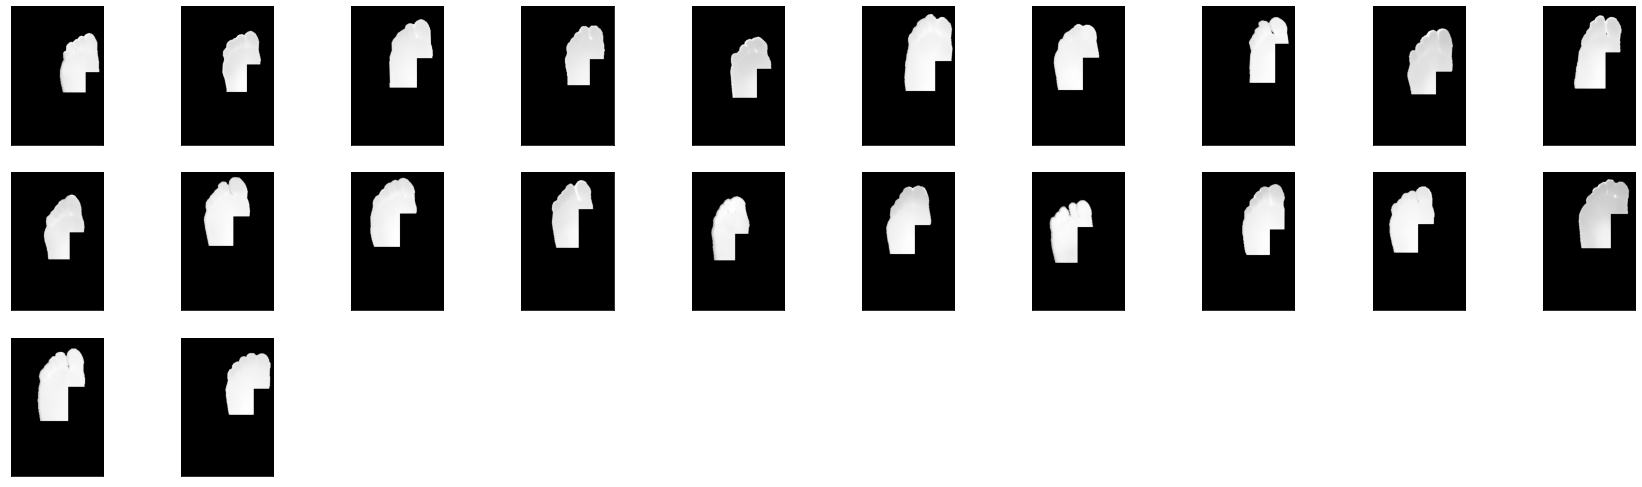

In [3]:
# Plot image for checking purposes
# Specify the overall grid size
plt.figure(figsize=(30,30)) 

for i in range(len(image_list)):
    # The number of images in the grid is 22 distributed in a 10 by 10 matrix
    plt.subplot(10,10,i+1)    
    plt.imshow(image_list[i], cmap=plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# Extract mean value for each angiosome on each image
# Define list in which data will be stored
R_LPA_mean = []
R_LPA_std = []
R_LPA_max = []
R_LPA_min = []
R_LPA_skew = []
R_LPA_kurtosis = []
R_LPA_img = []

subject = []

for i in range(len(image_list)):
    # Save image as array
    img = np.asarray(image_list[i][image_list[i] > 0])
    R_LPA_img.append(img)
    # Mean value
    img_mean = np.mean(image_list[i][image_list[i] > 0])   
    R_LPA_mean.append(img_mean)
    # Standard deviation 
    img_std = np.std(image_list[i][image_list[i] > 0])   
    R_LPA_std.append(img_std)
    # Maximum value
    img_max = np.max(image_list[i][image_list[i] > 0])   
    R_LPA_max.append(img_max)
    # Minimum value
    img_min = np.min(image_list[i][image_list[i] > 0])   
    R_LPA_min.append(img_min)
    # Skew
    img_skew = skew(image_list[i][image_list[i] > 0])   
    R_LPA_skew.append(img_skew)
    # Kurtosis
    img_kurtosis = kurtosis(image_list[i][image_list[i] > 0])   
    R_LPA_kurtosis.append(img_kurtosis)
    # Subject
    subject.append(code[i])
    print(subject[i], R_LPA_mean[i], R_LPA_std[i], R_LPA_max[i], R_LPA_min[i], R_LPA_skew[i], R_LPA_kurtosis[i])   


ADM001_Tmap_T15_R_LPA 26.769417 3.5284083 31.111237 0.12731895 -4.80019934137049 26.130561335274148
ADM004_Tmap_T15_R_LPA 19.05351 2.5472808 22.721834 0.065047905 -3.9585818959375225 22.57954190175464
CTA002_Tmap_T15_R_LPA 23.035816 2.76317 26.545362 0.24075356 -4.88463187376061 30.366515234554228
CTA003_Tmap_T15_R_LPA 21.978247 3.076504 26.994053 0.046373554 -4.622209050193203 25.498811962574685
CTA004_Tmap_T15_R_LPA 20.071892 2.6448267 25.619505 0.061923925 -4.157790532807789 24.38821596263829
ESP001_Tmap_T15_R_LPA 24.983522 2.9669948 28.017797 0.045910746 -5.054308696854805 32.0487763821448
ESP002_Tmap_T15_R_LPA 24.698248 3.0096753 27.572104 0.044059493 -5.258655439131736 32.68941527431824
ESP003_Tmap_T15_R_LPA 26.367805 3.5867708 29.373493 0.16230747 -4.608428092977896 24.918592713622644
ESP006_Tmap_T15_R_LPA 22.1914 2.8514957 28.438032 0.050538868 -4.233159352105672 25.564955541032795
ESP008_Tmap_T15_R_LPA 23.121037 3.1000679 27.260635 0.08534211 -3.5748217872918517 19.99265795472

In [5]:
# Initialize data of lists
data = {'Subject': subject,
        'R_LPA_mean': R_LPA_mean, 
        'R_LPA_std': R_LPA_std,
        'R_LPA_max': R_LPA_max,
        'R_LPA_min': R_LPA_min,
        'R_LPA_skew': R_LPA_skew,
        'R_LPA_kurtosis': R_LPA_kurtosis}
  
# Create DataFrame
df = pd.DataFrame(data)
display(df)

df.to_csv('R_LPA.csv', index=False) 

,Subject,R_LPA_mean,R_LPA_std,R_LPA_max,R_LPA_min,R_LPA_skew,R_LPA_kurtosis
0,ADM001_Tmap_T15_R_LPA,26.769417,3.528408,31.111237,0.127319,-4.800199,26.130561
1,ADM004_Tmap_T15_R_LPA,19.053511,2.547281,22.721834,0.065048,-3.958582,22.579542
2,CTA002_Tmap_T15_R_LPA,23.035816,2.763170,26.545362,0.240754,-4.884632,30.366515
3,CTA003_Tmap_T15_R_LPA,21.978247,3.076504,26.994053,0.046374,-4.622209,25.498812
4,CTA004_Tmap_T15_R_LPA,20.071892,2.644827,25.619505,0.061924,-4.157791,24.388216
5,ESP001_Tmap_T15_R_LPA,24.983522,2.966995,28.017797,0.045911,-5.054309,32.048776
6,ESP002_Tmap_T15_R_LPA,24.698248,3.009675,27.572104,0.044059,-5.258655,32.689415
7,ESP003_Tmap_T15_R_LPA,26.367805,3.586771,29.373493,0.162307,-4.608428,24.918593
8,ESP006_Tmap_T15_R_LPA,22.191401,2.851496,28.438032,0.050539,-4.233159,25.564956
9,ESP008_Tmap_T15_R_LPA,23.121037,3.100068,27.260635,0.085342,-3.574822,19.992658


In [6]:
# Total values for this angiosome
# Concatenate all data for extracting parameters
R_LPA_all = np.concatenate((R_LPA_img[0],R_LPA_img[1],R_LPA_img[2],R_LPA_img[3],R_LPA_img[4],R_LPA_img[5],
                            R_LPA_img[6],R_LPA_img[7],R_LPA_img[8],R_LPA_img[9],R_LPA_img[10],R_LPA_img[11],
                            R_LPA_img[12],R_LPA_img[13],R_LPA_img[14],R_LPA_img[15],R_LPA_img[16],R_LPA_img[17],
                            R_LPA_img[18],R_LPA_img[19],R_LPA_img[20],R_LPA_img[21]))
R_LPA_all_mean = np.mean(R_LPA_all)
R_LPA_all_std = np.std(R_LPA_all)
R_LPA_all_max = np.max(R_LPA_all)
R_LPA_all_min = np.min(R_LPA_all)
R_LPA_all_skew = skew(R_LPA_all)
R_LPA_all_kurtosis = kurtosis(R_LPA_all)


# Initialize data of lists
data2 = {'Variables':['R_LPA_all_mean', 'R_LPA_all_std', 'R_LPA_all_max', 'R_LPA_all_min', 'R_LPA_all_skew', 
                      'R_LPA_all_kurtosis'],
         'Values': [R_LPA_all_mean, R_LPA_all_std, R_LPA_all_max, R_LPA_all_min, R_LPA_all_skew, R_LPA_all_kurtosis]}
  
# Create DataFrame
df2 = pd.DataFrame(data2)
display(df2)

df2.to_csv('R_LPA_all.csv', index=False) 


,Variables,Values
0,R_LPA_all_mean,23.758341
1,R_LPA_all_std,4.189211
2,R_LPA_all_max,32.803284
3,R_LPA_all_min,0.019600
4,R_LPA_all_skew,-1.632405
5,R_LPA_all_kurtosis,6.510935


In [7]:
a_file = open("R_LPA.txt", "w")
np.savetxt(a_file, R_LPA_all)
a_file.close()